------------------------------------------------
###Title: HW 3: Classification in Python
###Author: UDIT CHAUDAHRY
###Date: 2023-10-20(YYYY_MM_DD)
------------------------------------------------

###Classification in Python

####Art History Data

"Janson's History of Art" or "Gardner's Art" classifies each artist. Based on the country, gender, race, ethnicity, and number of exhibitions in prestigious museums (MoMA and The Whitney) by a particular publication year, through the Ages. Variables such as 'edition_number', 'year', 'artist_nationality_other', 'space_ratio_per_page_total', 'artist_unique_id', 'artist_race_nwi' have been dropped.
All other properties have been encoded and transformed into numeric values, with the exception of "artist_name" and "book". We will first import the data into a Pandas DataFrame object and show its content to demonstrate this.

In [ ]:
import pandas as pd

Read the Art History Data by using the pandas and storing it in the Data Variable

In [ ]:
#Read the Art History Data
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv', header='infer')
data

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Winslow Homer,4.0,1991,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.377853,407,1,0,White
3158,Winslow Homer,5.0,1995,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.335776,407,1,0,White
3159,Winslow Homer,6.0,2001,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.324369,407,1,0,White
3160,Winslow Homer,7.0,2007,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.323356,407,1,0,White


Data is summarized using the pandas crosstab function according to the 'artist_gender' and 'artist_race' columns.

In [ ]:
pd.crosstab([data['artist_gender'],data['artist_race']],data['book'])

book                                                     Gardner  Janson
artist_gender artist_race                                               
Female        American Indian or Alaska Native                 0       2
              Asian                                            4       0
              Black or African American                       11       0
              Native Hawaiian or Other Pacific Islander        7       0
              White                                          194     120
Male          American Indian or Alaska Native                 2       0
              Asian                                           60       2
              Black or African American                       44      28
              Native Hawaiian or Other Pacific Islander        5       0
              White                                         1554    1067

In [ ]:
print(data.columns)

Index(['artist_name', 'edition_number', 'year', 'artist_nationality',
       'artist_nationality_other', 'artist_gender', 'artist_race',
       'artist_ethnicity', 'book', 'space_ratio_per_page_total',
       'artist_unique_id', 'moma_count_to_year', 'whitney_count_to_year',
       'artist_race_nwi'],
      dtype='object')


To initialize, import LabelEncoder from sklearn.preprocessing. To convert columns containing string values to numerical values, use LabelEncoder fit transform method.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert the categorical variable 'artist_name' to numerical labels
data['artist_nationality_en'] = le.fit_transform(data['artist_nationality'])
data['artist_gender_en'] = le.fit_transform(data['artist_gender'])
data['artist_race_en'] = le.fit_transform(data['artist_race'])
data['artist_ethnicity_en'] = le.fit_transform(data['artist_ethnicity'])

In [ ]:
data.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,artist_nationality_en,artist_gender_en,artist_race_en,artist_ethnicity_en
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White,0,1,2,1
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White,0,1,2,1
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White,0,1,2,1
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White,0,1,2,1
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White,0,1,2,1


In [ ]:
data.columns

Index(['artist_name', 'edition_number', 'year', 'artist_nationality',
       'artist_nationality_other', 'artist_gender', 'artist_race',
       'artist_ethnicity', 'book', 'space_ratio_per_page_total',
       'artist_unique_id', 'moma_count_to_year', 'whitney_count_to_year',
       'artist_race_nwi', 'artist_nationality_en', 'artist_gender_en',
       'artist_race_en', 'artist_ethnicity_en'],
      dtype='object')

Remove all the unwanted columns from the data. Select all the unwanted columns and drop them from the 'data' dataset.

In [ ]:
unwanted_columns = ['artist_nationality', 'artist_gender', 'artist_race', 'artist_ethnicity','edition_number', 'year', 'artist_nationality_other', 'space_ratio_per_page_total', 'artist_unique_id','artist_race_nwi']
data.drop(unwanted_columns, axis=1, inplace=True)

data

,artist_name,book,moma_count_to_year,whitney_count_to_year,artist_nationality_en,artist_gender_en,artist_race_en,artist_ethnicity_en
0,Aaron Douglas,Gardner,0,0,0,1,2,1
1,Aaron Douglas,Gardner,0,0,0,1,2,1
2,Aaron Douglas,Gardner,0,0,0,1,2,1
3,Aaron Douglas,Gardner,0,0,0,1,2,1
4,Aaron Douglas,Gardner,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
3157,Winslow Homer,Janson,1,0,0,1,4,1
3158,Winslow Homer,Janson,1,0,0,1,4,1
3159,Winslow Homer,Janson,1,0,0,1,4,1
3160,Winslow Homer,Janson,1,0,0,1,4,1


####Decision Tree Classifier

In this section, we apply a decision tree classifier to the artist dataset described in the previous subsection.

Entropy will be used as the decision tree classifier object's impurity measure for splitting criterion after the commands mentioned above extract the predictor (X) and target class (Y) characteristics from the artist dataset Additionally, the aforementioned classifier is limited to producing trees with a maximum depth of three. The fit() function is then used to train the classifier on the labeled data. The decision tree that is produced when the classifier is trained can be plotted.

In [ ]:
from sklearn import tree

Y = data['book']
X = data.drop(['artist_name','book'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

Using entropy with max_depth = 3 as the impurity measure for the splitting criteria, the aforementioned commands will extract the predictor (X) and target class (Y) characteristics from the vertebrate dataset and produce a decision tree classifier object.

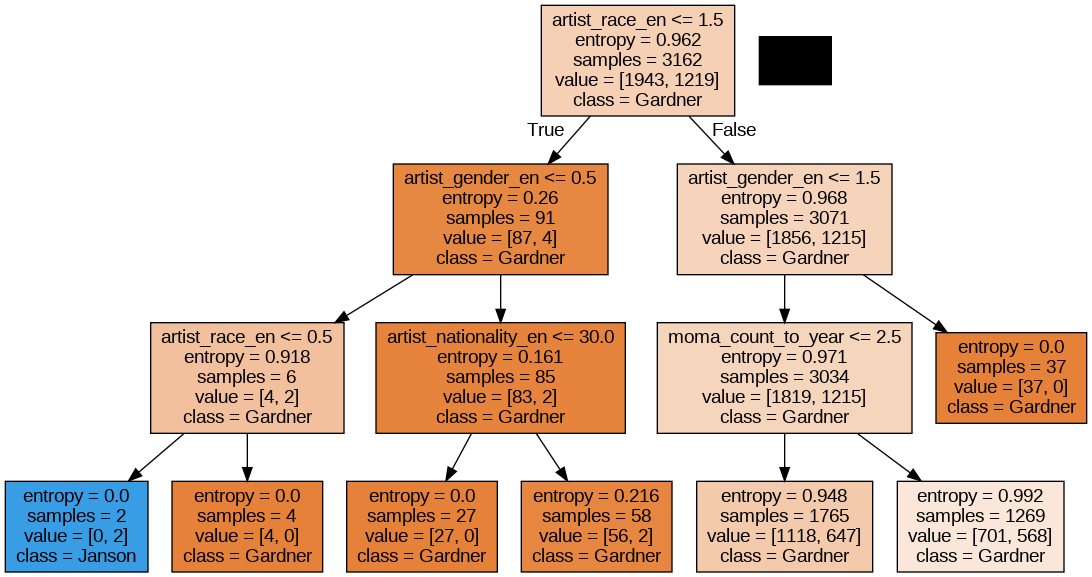

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Gardner','Janson'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The following test cases are then classified using the decision tree.

In [ ]:
testData = [['gila','Gardner',0,1,0,0,1,1],
           ['plat','Janson',1,0,0,0,1,1],
           ['owline','Gardner',1,0,0,1,1,0],
           ['dolp','Janson',1,1,1,0,0,0]]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,artist_name,book,moma_count_to_year,whitney_count_to_year,artist_nationality_en,artist_gender_en,artist_race_en,artist_ethnicity_en
0,gila,Gardner,0,1,0,0,1,1
1,plat,Janson,1,0,0,0,1,1
2,owline,Gardner,1,0,0,1,1,0
3,dolp,Janson,1,1,1,0,0,0


In [ ]:
data.head()

,artist_name,book,moma_count_to_year,whitney_count_to_year,artist_nationality_en,artist_gender_en,artist_race_en,artist_ethnicity_en
0,Aaron Douglas,Gardner,0,0,0,1,2,1
1,Aaron Douglas,Gardner,0,0,0,1,2,1
2,Aaron Douglas,Gardner,0,0,0,1,2,1
3,Aaron Douglas,Gardner,0,0,0,1,2,1
4,Aaron Douglas,Gardner,0,0,0,1,2,1


The decision tree classifier is used to forecast the classes of the predictor and target class attributes that we have initially extracted from the test data.

In [ ]:
testY = testData['book']
testX = testData.drop(['artist_name','book'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['artist_name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,artist_name,Predicted Class
0,gila,Gardner
1,plat,Gardner
2,owline,Gardner
3,dolp,Janson


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


####Model Overfitting

In this case, we set aside 20% for testing and the remaining 80% for training of the labeled data. The decision trees are then fitted to the training set at various maximum depths (ranging from 2 to 50) and their corresponding accuracies are plotted for both the training and test sets.

In [ ]:
df = pd.DataFrame(data)
df.to_csv('dataframe.csv', index=False)

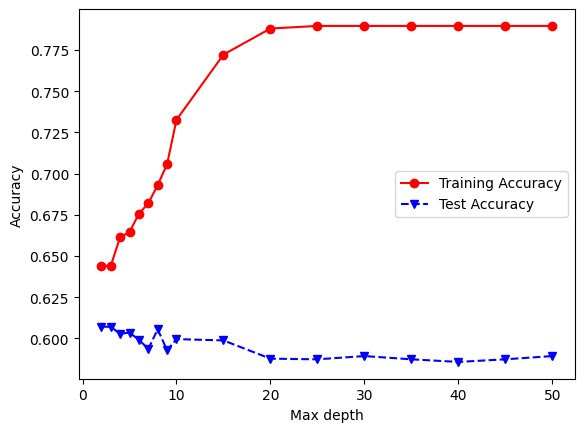

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded and named 'data'
# Extract features and target variable
X = data.drop(['book', 'artist_name'], axis=1)
Y = data['book']

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

# Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

# Plot of training and test accuracies
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()


####Alternative Classification Techniques

Other classification methods are supported by the Python sklearn package in addition to decision tree classifier. In this part, we present examples of how to use the 2-dimensional data from the previous section with the k-nearest neighbor classifier, linear classifiers (support vector machine and logistic regression), and ensemble approaches (boosting, bagging, and random forest).

#####K-Nearest Neighbor Classifier

This method predicts a test instance's class label by looking at the majority class of its k nearest training examples. A hyperparameter that has to be supplied by the user in addition to the distance metric is the number of nearest neighbors, or k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

clf

KNeighborsClassifier(n_neighbors=30)

Text(0, 0.5, 'Accuracy')

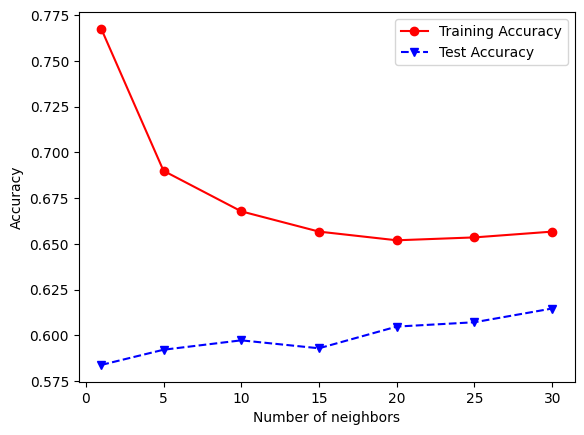

In [ ]:
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In the plot the Training & Testing Accuracy is starting at 0.770 and 0.585 for the Number of Neighbors 1, and ending at 0.660 and 0.615 for the Number of Neighbors 30 respectively. Training Accuracy is the highest at 0.770 for the Number of Neighbors 1 and Testing Accuracy is the highest at 0.615 for the Number of Neighbors 100.

#####Linear Classifiers

To separate examples from various classes, linear classifiers like logistic regression and support vector machines (SVM) build a linear separation hyperplane.

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = linear_model.LogisticRegression(C=param)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

clf

SVC(C=50, kernel='linear')

Text(0, 0.5, 'Accuracy')

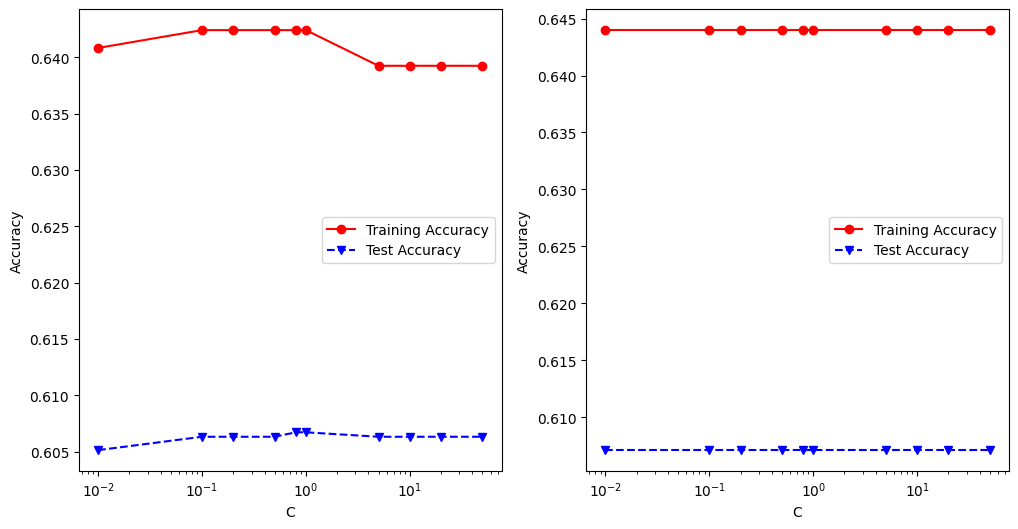

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

In the plot the Training & Testing Accuracy is starting at 0.641 and 0.605 for the C value 0.01 and ending at 0.639 and 0.606 for the C value 100 respectively. Training Accuracy is the highest at 0.642 for the C value 1 and Testing Accuracy is the highest at 0.608 for the C value 1.

#####Nonlinear Support Vector Machine

The code below demonstrates how to fit a 2-dimensional dataset using a nonlinear support vector machine and a Gaussian radial basis function kernel.

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

clf

SVC(C=50, gamma='auto')

Text(0, 0.5, 'Accuracy')

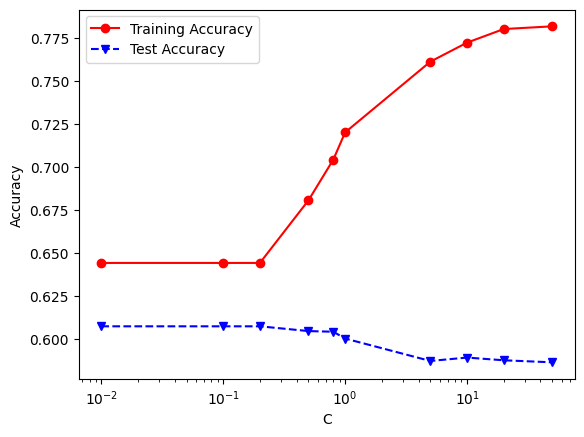

In [ ]:
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In the plot the Training & Testing Accuracy is starting at 0.645 and 0.610 for the C value 0.01 and ending at 0.780 and 0.590 for the C value 100 respectively. Training Accuracy is the highest at 0.780 for the C value 100 and Test Accuracy is the highest at 0.610 for the C value 0.01.

#####Ensemble Methods

Using the training data, an ensemble classifier builds a set of base classifiers and then classifies the data by voting on each base classifier's predictions. In this example, we examine three different kinds of ensemble classifiers: bagging, boosting, and random forest. In Section 4.10 of the book, these classifiers are explained in detail. In the example below, we apply each ensemble approach to fit 500 base classifiers to the 2-dimensional dataset. A decision tree with a maximum depth of ten equals the base classifier.

In [ ]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=500)

In [ ]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=500)

[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

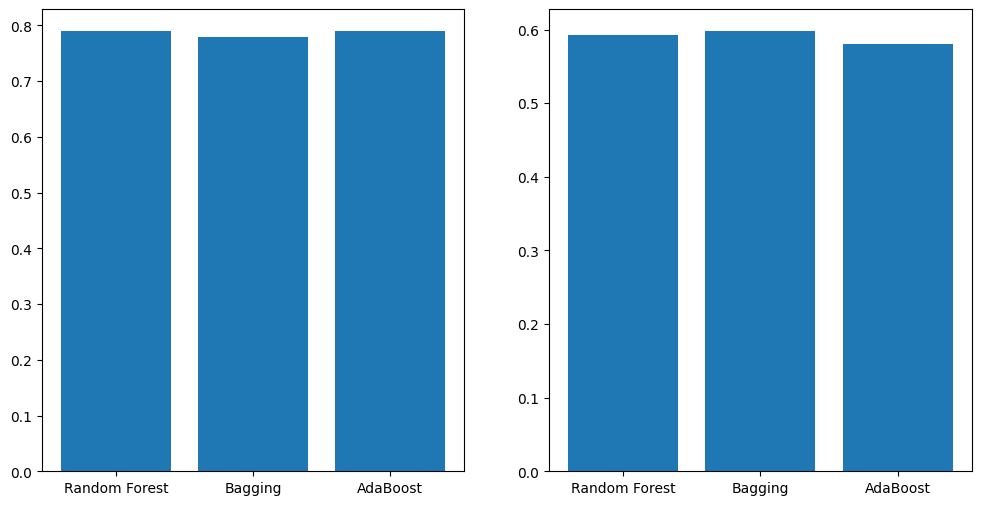

In [ ]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

In the plot the Training Accuracy of Random Forest is 0.79, Bagging is 0.78 and AdaBoost is 0.79. The Test Accuracy of Random Forest is 0.59, Bagging is 0.6 and AdaBoost is 0.58.